In [1]:
# toc
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('maroon_ipynb.mplstyle')

# Problem 4.1
Compute the stress required to produce 100 microstrain in APC 856 when the applied electric field is held constant at zero  Compute the stress required to produce 100 microstrain when the electric displacement is held equal to zero.

![PZT Materials](PZT_materials.png)

## Solution
We can use the constitutive equations. 

$$
S = sT + dE
$$
$$
D = dT + \epsilon E
$$

In [2]:
S = 100e-6
s = 17e-12  # m^2/N
T = S/s
T  # Pa

5882352.941176471

For finding the open circuit stress, we need the open circuit compliance.

$$s^D = s^E(1 - k^2)$$

In [3]:
SD = s*(1 - 0.73**2)
T = S/SD
T  # Pa

12593348.193484202

# Problem 4.2
A new composition of piezoelectric material is found to have a compliance at zero electric field of $18.2 \mu m^2/N$, a piezoelectric strain coefficient of $330 pm/V$, and a relative permittivity of 1500.

a. Write the one-dimensional constitutive relationship for the material with strain and electric displacement as the dependent variables.
b. Write the one-dimensional constitutive relationship with stress and electric field as the dependent variables.

## Solution
### Part A

In [4]:
S, D, s, d, eps, T, E = sp.symbols(r'S D s d \epsilon T E')
A = sp.Matrix([[s, d], [d, eps]])
x = sp.Matrix([T, E])
b = sp.Matrix([S, D])
eq = sp.Eq(b, sp.MatMul(A, x))
eq

Eq(Matrix([
[S],
[D]]), Matrix([
[s,        d],
[d, \epsilon]])*Matrix([
[T],
[E]]))

$\epsilon = \epsilon_r\cdot\epsilon_o$

In [5]:
subs = {s: sp.S('18.2e-6'), d: sp.S('330e-12'), eps: 1500*sp.S('8.854e-12')}
eq.subs(subs)

Eq(Matrix([
[S],
[D]]), Matrix([
[1.82e-5,   3.3e-10],
[3.3e-10, 1.3281e-8]])*Matrix([
[T],
[E]]))

### Part B

In [6]:
eq = sp.Eq(x, sp.MatMul(A.inv(), b))
eq

Eq(Matrix([
[T],
[E]]), Matrix([
[\epsilon/(\epsilon*s - d**2), -d/(\epsilon*s - d**2)],
[      -d/(\epsilon*s - d**2),  s/(\epsilon*s - d**2)]])*Matrix([
[S],
[D]]))

In [7]:
eq.subs(subs)

Eq(Matrix([
[T],
[E]]), Matrix([
[ 54945.0796995757, -1365.24932616971],
[-1365.24932616971,  75295568.8978449]])*Matrix([
[S],
[D]]))

# Problem 4.4
The short-circuit mechanical compliance of a piezoelectric material has been measured to be 20 $\mu m^2/N$ and the open-circuit mechanical compliance has been measured to be 16.2 $\mu m^2/N$. If the stress-free relative permittivity is equal to 2800, compute the relative permittivity of the material when the strain is constrained to be zero.

## Solution
We can use the equation for the open circuit compliance to find the piezoelectric coupling coefficient, and apply that to the no strain permittivity relationship.

$$s^D = s^E(1 - k^2)$$
$$\epsilon^S = \epsilon^T(1 - k^2)$$

In [8]:
sD, sE, epsT = 16.2e-6, 20e-6, 2800
k = np.sqrt(1 - sD/sE)
k

0.43588989435406744

In [9]:
epsS = epsT*(1 - k**2)
epsS

2268.0

# Problem 4.5
Compute the sensitivity between strain and electric displacement for a piezoelectric material whose material parameters are $s^E = 16 \mu m^2/N$ and $d = 220 pm/V$, with a relative permittivity of 1800. Assume that the signal conditioning circuit for the sensor maintains a zero electric field.

## Solution
The sensitivity is going to be defined as the ratio between electric displacement and strain. With the zero electric field,

$$S = s^ET$$
$$D = dT$$

These equations can be re-arranged to find the sensitivity.

$$\frac{D}{S} = \frac{d}{s^E}$$

In [10]:
sE, d, eps = 16e-12, 220e-12, 1800
d/sE  # C/m^2

13.75

# Problem 4.6
Beginning with equation 4.55, write the constitutive relationships for a piezoelectric material with an electric field applied in the direction of polarization (the 3 direction). Assume that the applied stress is zero except for the 1 and 2 material directions.

## Solution
Equation 4.55 is

$$
\left\{\begin{array}{l}
\mathrm{S}_1 \\
\mathrm{S}_2 \\
\mathrm{S}_3 \\
\mathrm{S}_4 \\
\mathrm{S}_5 \\
\mathrm{S}_6
\end{array}\right\}=\left[\begin{array}{cccccc}
\frac{1}{Y_1^{\mathrm{E}}} & -\frac{\nu_{12}}{Y_1^{\mathrm{E}}} & -\frac{\nu_{13}}{Y_1^{\mathrm{E}}} & 0 & 0 & 0 \\
-\frac{v_{12}}{Y_1^{\mathrm{E}}} & \frac{1}{Y_1^{\mathrm{E}}} & -\frac{\nu_{23}}{Y_1^{\mathrm{E}}} & 0 & 0 & 0 \\
-\frac{\nu_{31}}{Y_3^{\mathrm{E}}} & -\frac{\nu_{32}}{Y_3^{\mathrm{E}}} & \frac{1}{Y_3^{\mathrm{E}}} & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{1}{G_{23}^{\mathrm{E}}} & 0 & 0 \\
0 & 0 & 0 & 0 & \frac{1}{G_{13}^{\mathrm{E}}} & 0 \\
0 & 0 & 0 & 0 & 0 & \frac{1}{G_{12}^{\mathrm{E}}}
\end{array}\right]\left\{\begin{array}{c}
\mathrm{T}_1 \\
\mathrm{T}_2 \\
\mathrm{T}_3 \\
\mathrm{T}_4 \\
\mathrm{T}_5 \\
\mathrm{T}_6
\end{array}\right\}+\left[\begin{array}{ccc}
0 & 0 & d_{13} \\
0 & 0 & d_{23} \\
0 & 0 & d_{33} \\
0 & d_{24} & 0 \\
d_{15} & 0 & 0 \\
0 & 0 & 0
\end{array}\right]\left\{\begin{array}{l}
\mathrm{E}_1 \\
\mathrm{E}_2 \\
\mathrm{E}_3
\end{array}\right\}
$$

$$
\left\{\begin{array}{l}
\mathrm{D}_1 \\
\mathrm{D}_2 \\
\mathrm{D}_3
\end{array}\right\}=\left[\begin{array}{cccccc}
0 & 0 & 0 & 0 & d_{15} & 0 \\
0 & 0 & 0 & d_{24} & 0 & 0 \\
d_{13} & d_{23} & d_{33} & 0 & 0 & 0
\end{array}\right]\left\{\begin{array}{l}
\mathrm{T}_1 \\
\mathrm{T}_2 \\
\mathrm{T}_3 \\
\mathrm{T}_4 \\
\mathrm{T}_5 \\
\mathrm{T}_6
\end{array}\right\}+\left[\begin{array}{ccc}
\varepsilon_{11} & 0 & 0 \\
0 & \varepsilon_{22} & 0 \\
0 & 0 & \varepsilon_{33}
\end{array}\right]\left\{\begin{array}{l}
\mathrm{E}_1 \\
\mathrm{E}_2 \\
\mathrm{E}_3
\end{array}\right\}
$$

In [11]:
S1, S2, S3, S4, S5, S6 = sp.symbols(r'S1:7')
T1, T2, T3, T4, T5, T6 = sp.symbols(r'T1:7')
E1, E2, E3 = sp.symbols(r'E1:4')
D1, D2, D3 = sp.symbols(r'D1 D2 D3')
eps11, eps22, eps33 = sp.symbols(r'\varepsilon_{11} \varepsilon_{22} \varepsilon_{33}')
d13, d23, d33, d24, d15 = sp.symbols(r'd13 d23 d33 d24 d15')
Y1E, Y3E, G23E, G13E, G12E = sp.symbols(r'Y_1^E Y_3^E G_{23}^E G_{13}^E G_{12}^E')
nu12, nu13, nu23, nu31, nu32 = sp.symbols(r'\nu_{12} \nu_{13} \nu_{23} \nu_{31} \nu_{32}')

sE = sp.Matrix([
    [1/Y1E, -nu12/Y1E, -nu13/Y1E, 0, 0, 0],
    [-nu12/Y1E, 1/Y1E, -nu23/Y1E, 0, 0, 0],
    [-nu31/Y3E, -nu32/Y3E, 1/Y3E, 0, 0, 0],
    [0, 0, 0, 1/G23E, 0, 0],
    [0, 0, 0, 0, 1/G13E, 0],
    [0, 0, 0, 0, 0, 1/G12E]
])
S = sp.Matrix([S1, S2, S3, S4, S5, S6])
T = sp.Matrix([T1, T2, T3, T4, T5, T6])
d = sp.Matrix([
    [0, 0, d13],
    [0, 0, d23],
    [0, 0, d33],
    [0, d24, 0],
    [d15, 0, 0],
    [0, 0, 0]
])
E = sp.Matrix([E1, E2, E3])

D = sp.Matrix([D1, D2, D3])
eps = sp.Matrix([
    [eps11, 0, 0],
    [0, eps22, 0],
    [0, 0, eps33]
])

eq1 = sp.Eq(S, sp.Add(sp.MatMul(sE, T), sp.MatMul(d, E)))
eq2 = sp.Eq(D, sp.Add(sp.MatMul(d.transpose(), T), sp.MatMul(eps, E)))
display(eq1, eq2)

Eq(Matrix([
[S1],
[S2],
[S3],
[S4],
[S5],
[S6]]), Matrix([
[  0,   0, d13],
[  0,   0, d23],
[  0,   0, d33],
[  0, d24,   0],
[d15,   0,   0],
[  0,   0,   0]])*Matrix([
[E1],
[E2],
[E3]]) + Matrix([
[        1/Y_1^E, -\nu_{12}/Y_1^E, -\nu_{13}/Y_1^E,          0,          0,          0],
[-\nu_{12}/Y_1^E,         1/Y_1^E, -\nu_{23}/Y_1^E,          0,          0,          0],
[-\nu_{31}/Y_3^E, -\nu_{32}/Y_3^E,         1/Y_3^E,          0,          0,          0],
[              0,               0,               0, 1/G_{23}^E,          0,          0],
[              0,               0,               0,          0, 1/G_{13}^E,          0],
[              0,               0,               0,          0,          0, 1/G_{12}^E]])*Matrix([
[T1],
[T2],
[T3],
[T4],
[T5],
[T6]]))

Eq(Matrix([
[D1],
[D2],
[D3]]), Matrix([
[\varepsilon_{11},                0,                0],
[               0, \varepsilon_{22},                0],
[               0,                0, \varepsilon_{33}]])*Matrix([
[E1],
[E2],
[E3]]) + Matrix([
[  0,   0,   0,   0, d15, 0],
[  0,   0,   0, d24,   0, 0],
[d13, d23, d33,   0,   0, 0]])*Matrix([
[T1],
[T2],
[T3],
[T4],
[T5],
[T6]]))

In [12]:
subs = {T3: 0, T4: 0, T5: 0, T6: 0, E1: 0, E2: 0}
eq1 = eq1.subs(subs)
eq2 = eq2.subs(subs)
display(eq1, eq2)

Eq(Matrix([
[S1],
[S2],
[S3],
[S4],
[S5],
[S6]]), Matrix([
[  0,   0, d13],
[  0,   0, d23],
[  0,   0, d33],
[  0, d24,   0],
[d15,   0,   0],
[  0,   0,   0]])*Matrix([
[ 0],
[ 0],
[E3]]) + Matrix([
[        1/Y_1^E, -\nu_{12}/Y_1^E, -\nu_{13}/Y_1^E,          0,          0,          0],
[-\nu_{12}/Y_1^E,         1/Y_1^E, -\nu_{23}/Y_1^E,          0,          0,          0],
[-\nu_{31}/Y_3^E, -\nu_{32}/Y_3^E,         1/Y_3^E,          0,          0,          0],
[              0,               0,               0, 1/G_{23}^E,          0,          0],
[              0,               0,               0,          0, 1/G_{13}^E,          0],
[              0,               0,               0,          0,          0, 1/G_{12}^E]])*Matrix([
[T1],
[T2],
[ 0],
[ 0],
[ 0],
[ 0]]))

Eq(Matrix([
[D1],
[D2],
[D3]]), Matrix([
[\varepsilon_{11},                0,                0],
[               0, \varepsilon_{22},                0],
[               0,                0, \varepsilon_{33}]])*Matrix([
[ 0],
[ 0],
[E3]]) + Matrix([
[  0,   0,   0,   0, d15, 0],
[  0,   0,   0, d24,   0, 0],
[d13, d23, d33,   0,   0, 0]])*Matrix([
[T1],
[T2],
[ 0],
[ 0],
[ 0],
[ 0]]))

In [13]:
display(eq1.doit(), eq2.doit())

Eq(Matrix([
[S1],
[S2],
[S3],
[S4],
[S5],
[S6]]), Matrix([
[         E3*d13 + T1/Y_1^E - T2*\nu_{12}/Y_1^E],
[         E3*d23 - T1*\nu_{12}/Y_1^E + T2/Y_1^E],
[E3*d33 - T1*\nu_{31}/Y_3^E - T2*\nu_{32}/Y_3^E],
[                                             0],
[                                             0],
[                                             0]]))

Eq(Matrix([
[D1],
[D2],
[D3]]), Matrix([
[                                    0],
[                                    0],
[E3*\varepsilon_{33} + T1*d13 + T2*d23]]))

So, the final equations would be,

In [14]:
for eq in [eq1, eq2]:
    for i, rhs in enumerate(eq.rhs.doit()):
        if rhs != 0:
            display(sp.Eq(list(eq.lhs)[i], rhs))

Eq(S1, E3*d13 + T1/Y_1^E - T2*\nu_{12}/Y_1^E)

Eq(S2, E3*d23 - T1*\nu_{12}/Y_1^E + T2/Y_1^E)

Eq(S3, E3*d33 - T1*\nu_{31}/Y_3^E - T2*\nu_{32}/Y_3^E)

Eq(D3, E3*\varepsilon_{33} + T1*d13 + T2*d23)

# Problem 4.9
A piezoelectric material operating in the 33 mode has the material properties $d_{33}=450pm/V$ and $Y_3^E = 63 GPa$.

a. Compute the blocked stress and free strain under the application of an electric field of $0.75 MV/m$.
b. Compute the voltage required to achieve this blocked stress or free displacement for a wafer that is $250\mu m$ thick.

## Solution
### Part A
The blocking stress as a result of zeroing displacement is 

$$T_{bl} = d_{33}Y_3^EE_3$$

The free strain as a result of zeroing stress is

$$S_{fr} = d_{33}E_3$$

In [15]:
d33, Y3E, E3 = 450e-12, 63e9, 0.75e6
T_bl = d33*Y3E*E3
T_bl  # Pa

21262500.0

In [16]:
S_fr = d33*E3
S_fr

0.0003375

### Part B

In [17]:
# Voltage = Electric field * thickness
V = E3*250e-6
V  # V

187.5

# Problem 4.10
$$
\begin{array}{lcccccc}
\hline & & \text { PZT-A } & \text { PZT-B } & \text { PZT-C } & \text { PZT-D } & \text { PZT-E } \\
\hline \varepsilon_{33} & & 1400 & 1400 & 1100 & 5440 & 1800 \\
\varepsilon_{11} & & 1350 & 1300 & 1400 & 5000 & 2000 \\
s_{11}^{\mathrm{E}} & \left(\mu \mathrm{m}^2 / \mathrm{N}\right) & 12.7 & 13.1 & 11.2 & 14.8 & 16.5 \\
s_{33}^{\mathrm{E}} & \left(\mu \mathrm{m}^2 / \mathrm{N}\right) & 15.4 & 15.6 & 15.2 & 18.1 & 19.9 \\
d_{13} & (\mathrm{pm} / \mathrm{V}) & -133 & -132 & -99 & -287 & -198 \\
d_{33} & (\mathrm{pm} / \mathrm{V}) & 302 & 296 & 226 & 635 & 417 \\
\hline
\end{array}
$$

For each material above, 

a. Plot the blocked stress and free strain on a single plot.
b. Compute the volumetric energy density of each type of material for operation in the 33 mode for an electric field of $1 MV/m$.

## Solution
### Part A

PZT-A
Blocking Stress: 19.610389610389607 MPa
Free Strain: 301.99999999999994 microstrain

PZT-B
Blocking Stress: 18.974358974358974 MPa
Free Strain: 296.0 microstrain

PZT-C
Blocking Stress: 14.868421052631579 MPa
Free Strain: 226.0 microstrain

PZT-D
Blocking Stress: 35.0828729281768 MPa
Free Strain: 634.9999999999999 microstrain

PZT-E
Blocking Stress: 20.954773869346738 MPa
Free Strain: 417.0 microstrain



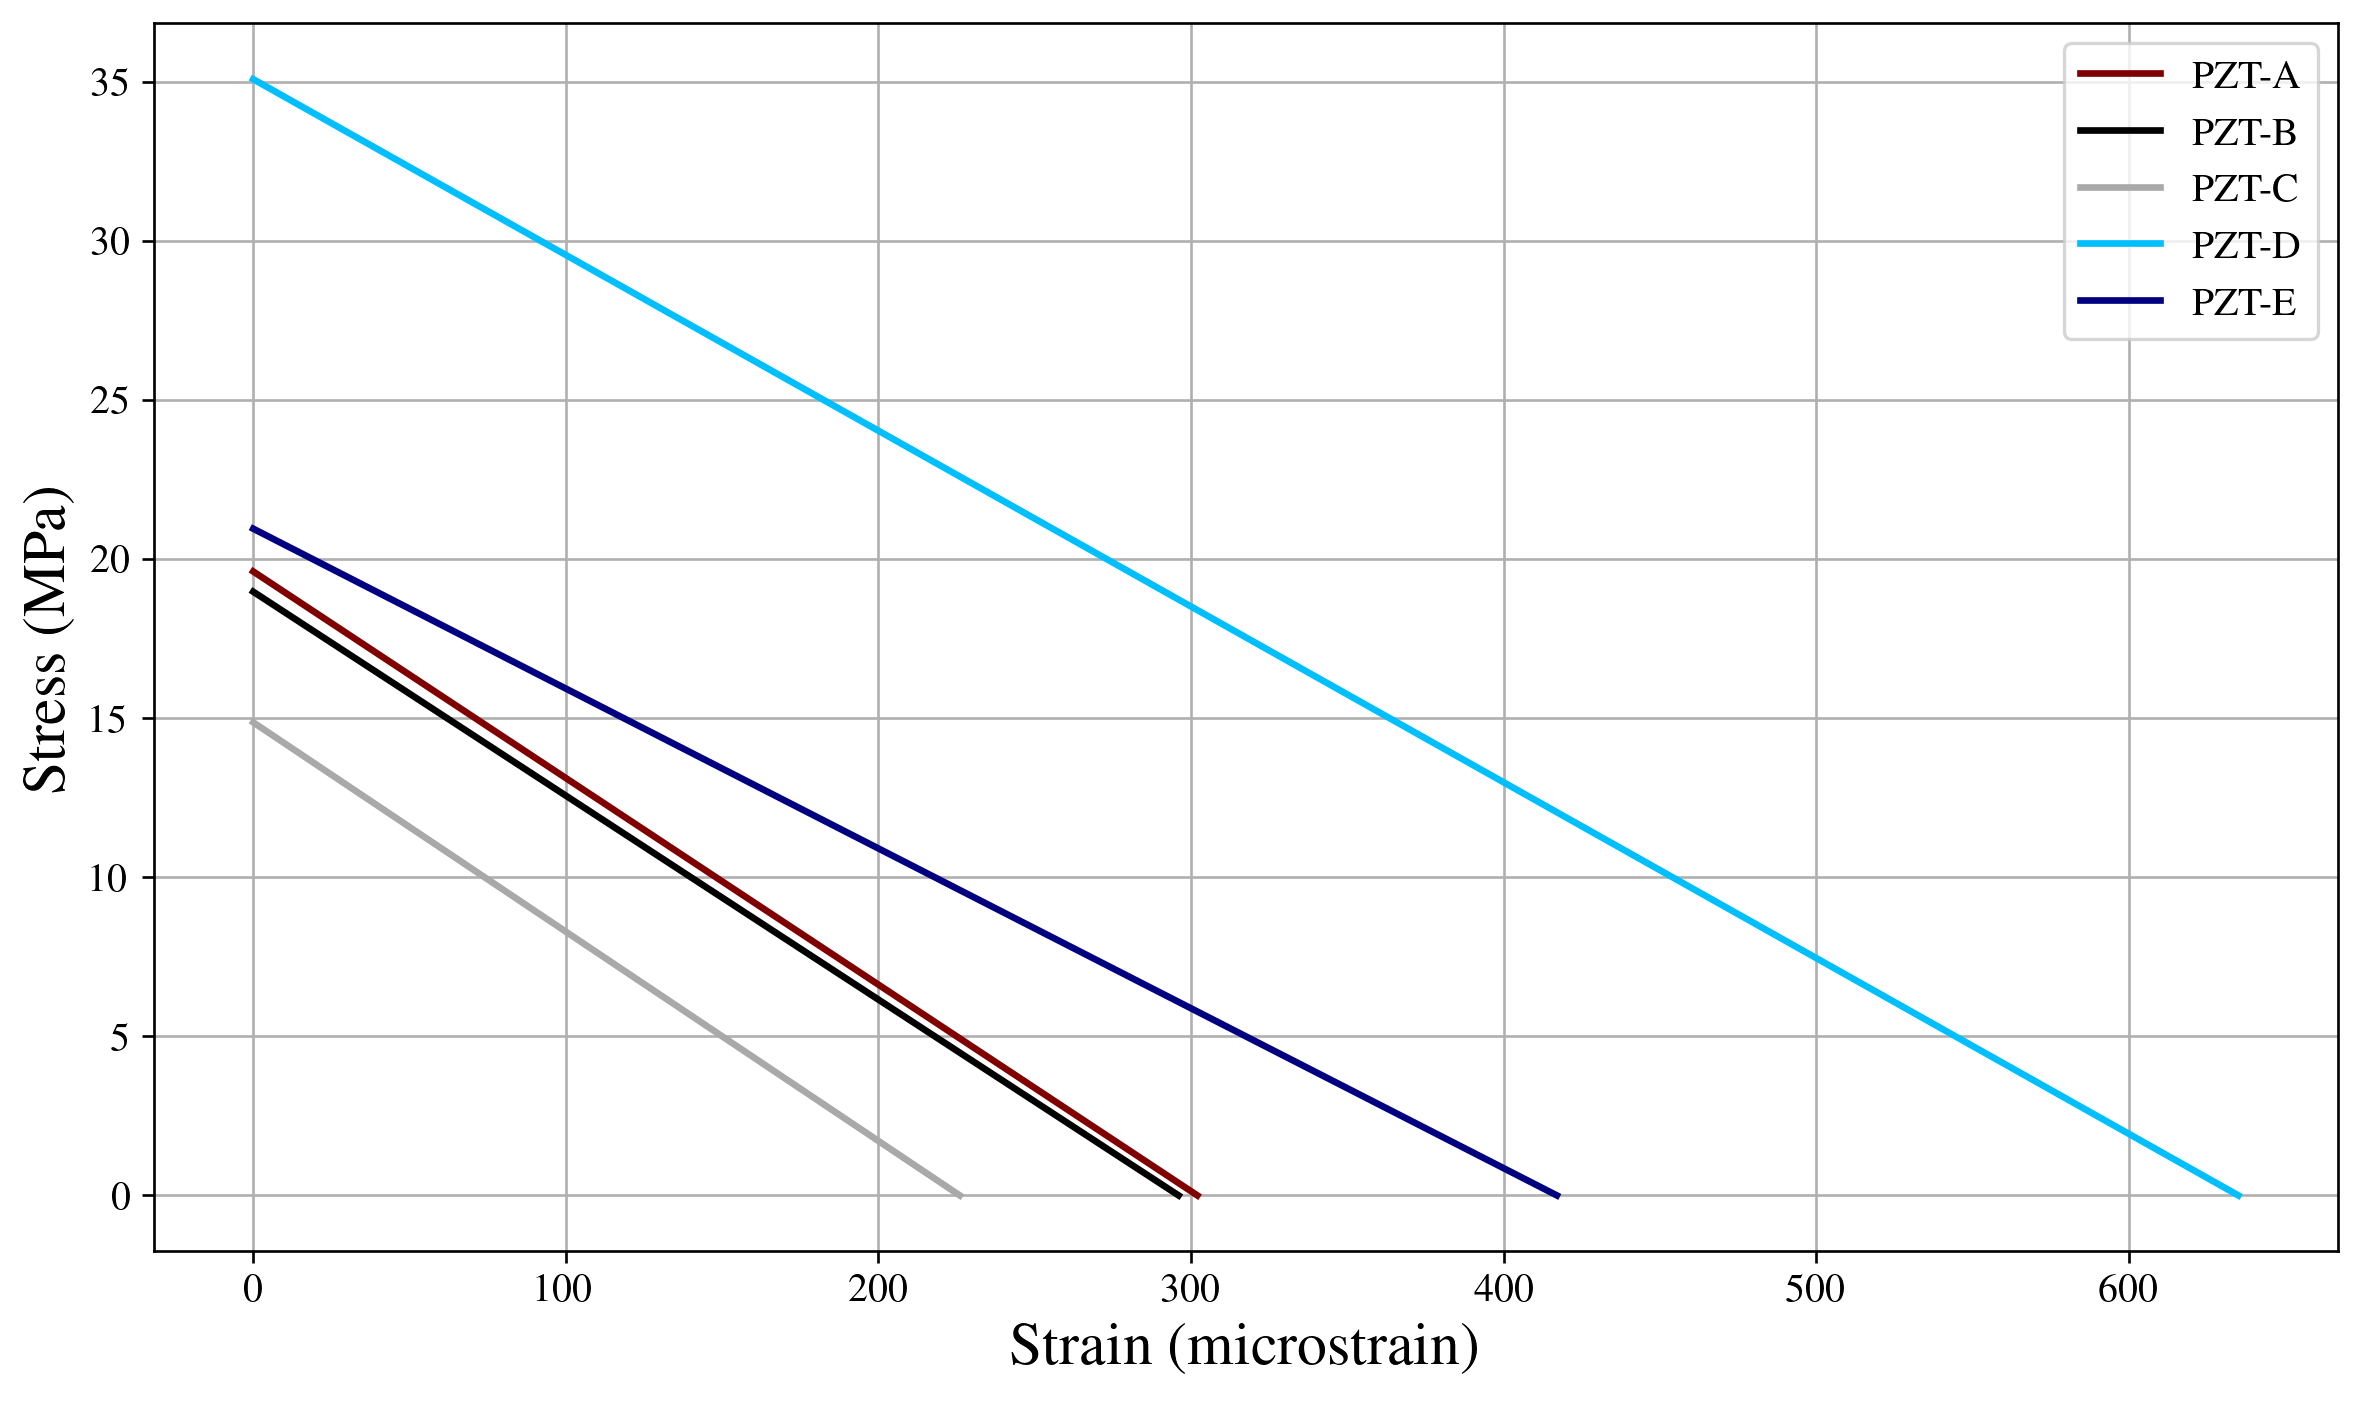

In [18]:
d33 = np.array([302, 296, 226, 635, 417])*1e-12
s33 = np.array([15.4, 15.6, 15.2, 18.1, 19.9])*1e-12
materials = ['PZT-A', 'PZT-B', 'PZT-C', 'PZT-D', 'PZT-E']
Y33 = 1/s33  # Pa

fig, ax = plt.subplots()
E = 1e6  # V/m
for d, Y, mat in zip(d33, Y33, materials):
    T = d*Y*E*1e-6  # MPa
    S = d*E*1e6  # microstrain
    ax.plot([0, S], [T, 0], label=mat)
    print(mat)
    print('Blocking Stress:', T, 'MPa')
    print('Free Strain:', S, 'microstrain')
    print()
ax.legend()
ax.set_xlabel('Strain (microstrain)')
ax.set_ylabel('Stress (MPa)')
plt.show()

### Part B
The volumetric energy density is given by

$$E_v = \frac{1}{2}Y_3^Ed_{33}^2E_3^2$$

This is the area under the line in the graph above. The $\frac{1}{2}Y_3^Ed_{33}^2$ term is a good metric for showing that a PZT material can provide more mechanical work for a given electric field.

In [19]:
E_v = 0.5*Y33*d33**2*E**2
E_v/1000  # kJ/m^3

array([ 2.96116883,  2.80820513,  1.68013158, 11.13881215,  4.36907035])

Note that the soft PZT material exhibits the highest volumetric energy density.